Saving Gemini_Generated_Image_kyjqvekyjqvekyjq.png to Gemini_Generated_Image_kyjqvekyjqvekyjq.png

Processing image: Gemini_Generated_Image_kyjqvekyjqvekyjq.png
✅ 74 lines detected.


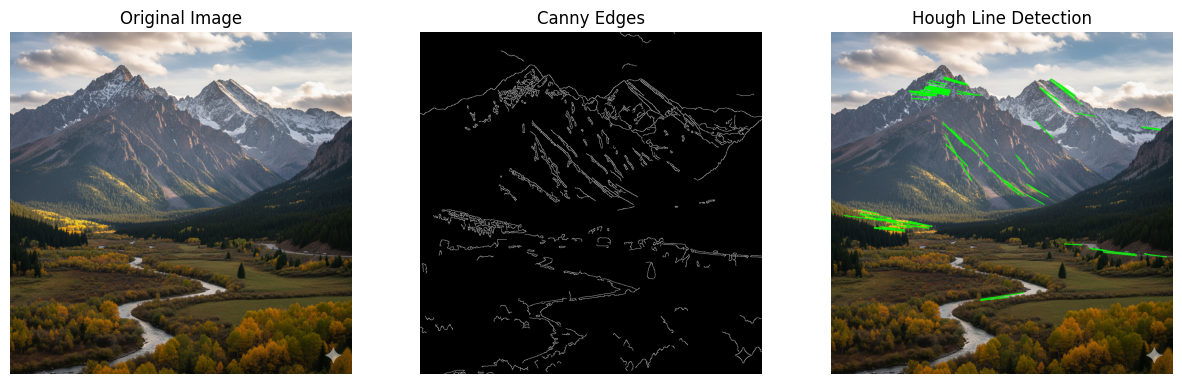

In [2]:
# ============================================
# Hough Transform based Line Finder
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1️⃣ Upload an image (you can reuse the same iris image)
uploaded = files.upload()

# 2️⃣ Process each uploaded image
for fname in uploaded.keys():
    print(f"\nProcessing image: {fname}")

    # Read image
    img = cv2.imread(fname)
    if img is None:
        print("⚠️ Could not load image, skipping.")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.5)

    # 3️⃣ Detect edges using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # 4️⃣ Hough Line Transform
    # Parameters:
    #   rho = 1 pixel resolution
    #   theta = 1 degree (π/180 radians)
    #   threshold = minimum intersections in accumulator
    #   minLineLength = shortest line to detect
    #   maxLineGap = maximum allowed gap between line segments
    lines = cv2.HoughLinesP(
        edges,
        rho=1,
        theta=np.pi / 180,
        threshold=80,
        minLineLength=50,
        maxLineGap=10
    )

    # 5️⃣ Draw detected lines on a copy of the original image
    line_img = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        print(f"✅ {len(lines)} lines detected.")
    else:
        print("⚠️ No lines detected.")

    # 6️⃣ Display results
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    plt.title('Hough Line Detection')
    plt.axis('off')

    plt.show()

# ✅ End of script
